# Getting the Data

The datasets consist of shelter data from the Austin's Animal Center's shelter. It consists of two seperate tables: one with the animals initial condition upon being recieved by the shelter and one with the animals outcome. The data is live and updated daily.

In [2]:
#download the data as a csv file in the current directory
# Since this file is large and we don't want to download data all the time
# this code was run last at (12/2)
import requests
import os

#give a big limit request to download all the shelter data
intake_url =  'https://data.austintexas.gov/resource/wter-evkm.csv?$limit=99999999999999999'
outcomes_url = 'https://data.austintexas.gov/resource/9t4d-g238.csv?$limit=99999999999999999'


response = requests.get(intake_url)
with open(os.path.join("intakes.csv"), 'wb') as f:
    f.write(response.content)

response = requests.get(outcomes_url)
with open(os.path.join("outcomes.csv"), 'wb') as f:
    f.write(response.content)

In [1]:
import pandas as pd
import numpy as np
import csv
from datetime import datetime

In [2]:
#read downloaded csvs
intakes = pd.read_csv("intakes.csv")
outcomes = pd.read_csv("outcomes.csv")

# Basic Exploration

In [3]:
intakes.head()

,animal_id,name,datetime,datetime2,found_location,intake_type,intake_condition,animal_type,sex_upon_intake,age_upon_intake,breed,color
0,A869978,NaN,2022-11-29T07:04:00.000,2022-11-29T07:04:00.000,14236 Fm 969 in Travis (TX),Stray,Sick,Dog,Intact Male,1 month,Cane Corso,Black
1,A869965,NaN,2022-11-28T19:00:00.000,2022-11-28T19:00:00.000,6704 Branrust Dr in Austin (TX),Stray,Injured,Cat,Unknown,2 years,Domestic Shorthair,Orange Tabby/White
2,A869969,Biji,2022-11-28T18:56:00.000,2022-11-28T18:56:00.000,Austin (TX),Owner Surrender,Normal,Cat,Neutered Male,1 year,Domestic Longhair,Blue/White
3,A869967,NaN,2022-11-28T18:46:00.000,2022-11-28T18:46:00.000,1309 Walnut Avenue in Travis (TX),Stray,Normal,Cat,Intact Female,1 year,Domestic Shorthair,Brown Tabby/White
4,A869968,NaN,2022-11-28T18:32:00.000,2022-11-28T18:32:00.000,11210 Ranch To Market 222 in Austin (TX),Owner Surrender,Normal,Dog,Unknown,2 years,Miniature Schnauzer,Black


Most of the columns are self explanatory. Note that we have two datetime columns that appear identical. 

In [4]:
outcomes.head()

,animal_id,name,datetime,monthyear,date_of_birth,outcome_type,outcome_subtype,animal_type,sex_upon_outcome,age_upon_outcome,breed,color
0,A869752,NaN,2022-11-29T05:00:00.000,2022-11-29T05:00:00.000,2012-11-23T00:00:00.000,Died,At Vet,Cat,Intact Male,10 years,Domestic Shorthair,Orange Tabby/White
1,A869596,NaN,2022-11-29T00:00:00.000,2022-11-29T00:00:00.000,2019-11-21T00:00:00.000,Adoption,NaN,Dog,Intact Male,3 years,Schipperke/Cardigan Welsh Corgi,Black
2,A861295,*Gordon,2022-11-28T19:12:00.000,2022-11-28T19:12:00.000,2022-05-05T00:00:00.000,Adoption,NaN,Dog,Neutered Male,6 months,Labrador Retriever/Pointer,Black/White
3,A869713,Princess,2022-11-28T18:57:00.000,2022-11-28T18:57:00.000,2017-11-28T00:00:00.000,Return to Owner,NaN,Dog,Intact Female,5 years,Pit Bull,Blue/White
4,A864284,*Sparkle,2022-11-28T18:45:00.000,2022-11-28T18:45:00.000,2020-03-23T00:00:00.000,Adoption,NaN,Dog,Spayed Female,2 years,Pit Bull,Brown Brindle


Outcome types include: 
<ul>
 <li>Adoption - animal adopted to a home</li>
 <li>Barn Adoption - animal adopted to a barn</li>
 <li>Offsite Missing - animal went missing at an offsite location</li>
 <li>In-Foster Missing - animal went missing from a foster home</li>
 <li>In-Kennel Missing - animal went missing from a kennel facility</li>
 <li>Possible Theft - animal may have been stolen from the shelter</li>
 <li>Barn Transfer - animal was transfered to a barn adoption facility</li>
 <li>SNR - released through Austin's Shelter-Neuter-Release program </li>
 </ul>

In [5]:
print(intakes['datetime'].equals(intakes['datetime2']))
print((outcomes['datetime'].equals(outcomes['monthyear'])))

True
True


Date columns are the same. Lets remove them.

In [6]:
intakes.drop('datetime2', inplace= True, axis = 1)
outcomes.drop('monthyear', inplace= True, axis = 1)

In [7]:
#number of rows in each
print(len(intakes))
print(len(outcomes))

146162
146240


 Oddly, there are more outcomes than intakes. Shouldn't it be the other way around?

In [8]:
print(intakes[intakes.duplicated()].size)
print(outcomes[outcomes.duplicated()].size)

253
209


In [9]:
intakes[intakes['animal_id'] == 'A857222']

,animal_id,name,datetime,found_location,intake_type,intake_condition,animal_type,sex_upon_intake,age_upon_intake,breed,color
6823,A857222,Keanu,2022-05-13T13:58:00.000,1800 S Ih 35 in Austin (TX),Owner Surrender,Normal,Other,Intact Male,8 months,Guinea Pig,White/Gray
6824,A857222,Keanu,2022-05-13T13:58:00.000,1800 S Ih 35 in Austin (TX),Owner Surrender,Normal,Other,Intact Male,8 months,Guinea Pig,White/Gray


It also appears that some observations are entirely duplicated. Let's fix that.

In [10]:
intakes.drop_duplicates(inplace = True)
outcomes.drop_duplicates(inplace = True)

In [11]:
len(intakes)

146139

In [12]:
intakes[intakes['animal_id'].duplicated()].head(2)

,animal_id,name,datetime,found_location,intake_type,intake_condition,animal_type,sex_upon_intake,age_upon_intake,breed,color
256,A869377,Henry,2022-11-17T13:35:00.000,810 E Slaughter Ln in Austin (TX),Owner Surrender,Normal,Dog,Intact Male,8 months,Dachshund/Doberman Pinsch,Tricolor
518,A845526,Jackson,2022-11-08T18:05:00.000,Thunder Gulch Drive in Austin (TX),Stray,Normal,Dog,Intact Male,1 year,Bull Terrier,White


In [13]:
intakes[intakes['animal_id'] == 'A867028']

,animal_id,name,datetime,found_location,intake_type,intake_condition,animal_type,sex_upon_intake,age_upon_intake,breed,color
944,A867028,*Scooter,2022-10-25T18:20:00.000,Austin (TX),Owner Surrender,Normal,Cat,Neutered Male,8 months,Domestic Shorthair Mix,Brown Tabby
1098,A867028,*Scooter,2022-10-19T16:45:00.000,Austin (TX),Owner Surrender,Normal,Cat,Neutered Male,8 months,Domestic Shorthair Mix,Brown Tabby
1364,A867028,*Scooter,2022-10-11T11:16:00.000,21501 Quail Valley Cove in Travis (TX),Stray,Normal,Cat,Intact Male,7 months,Domestic Shorthair Mix,Brown Tabby


Looks like some animals have passed through the shelter multiple times. 

In [14]:
intakes[~intakes['animal_id'].isin(outcomes['animal_id'])]

,animal_id,name,datetime,found_location,intake_type,intake_condition,animal_type,sex_upon_intake,age_upon_intake,breed,color
0,A869978,NaN,2022-11-29T07:04:00.000,14236 Fm 969 in Travis (TX),Stray,Sick,Dog,Intact Male,1 month,Cane Corso,Black
1,A869965,NaN,2022-11-28T19:00:00.000,6704 Branrust Dr in Austin (TX),Stray,Injured,Cat,Unknown,2 years,Domestic Shorthair,Orange Tabby/White
2,A869969,Biji,2022-11-28T18:56:00.000,Austin (TX),Owner Surrender,Normal,Cat,Neutered Male,1 year,Domestic Longhair,Blue/White
3,A869967,NaN,2022-11-28T18:46:00.000,1309 Walnut Avenue in Travis (TX),Stray,Normal,Cat,Intact Female,1 year,Domestic Shorthair,Brown Tabby/White
4,A869968,NaN,2022-11-28T18:32:00.000,11210 Ranch To Market 222 in Austin (TX),Owner Surrender,Normal,Dog,Unknown,2 years,Miniature Schnauzer,Black
...,...,...,...,...,...,...,...,...,...,...,...
16284,A840685,*Tajin,2021-08-12T09:19:00.000,1305 Walnut Avenue in Austin (TX),Stray,Normal,Dog,Intact Male,5 years,Pit Bull Mix,White/Black
17997,A838100,*Jacobina,2021-07-02T15:11:00.000,5312 Harmon Avenue in Austin (TX),Stray,Injured,Cat,Spayed Female,5 years,Domestic Shorthair Mix,Torbie
22703,A828658,*Joey,2021-01-22T15:52:00.000,6104 Old Fredericksburg Road in Austin (TX),Stray,Injured,Cat,Intact Male,2 years,Domestic Shorthair,Brown Tabby
117068,A645513,NaN,2015-05-18T07:30:00.000,3001 Sauls in Austin (TX),Stray,Injured,Cat,Neutered Male,6 years,Domestic Longhair Mix,Cream Tabby/White


In [15]:
#get animal ids that don't have an intake
outcomes.query('animal_id not in @intakes.animal_id')

,animal_id,name,datetime,date_of_birth,outcome_type,outcome_subtype,animal_type,sex_upon_outcome,age_upon_outcome,breed,color
61227,A651995,*Sugar,2018-07-02T15:34:00.000,2011-10-18T00:00:00.000,Adoption,Foster,Dog,Spayed Female,6 years,Staffordshire Mix,Brown/White
114899,A620557,Button,2015-06-22T13:08:00.000,2002-02-22T00:00:00.000,Euthanasia,Suffering,Cat,Spayed Female,13 years,Domestic Shorthair Mix,Black
120384,A663083,*Zack,2015-03-10T07:37:00.000,2011-09-12T00:00:00.000,Adoption,Foster,Dog,Neutered Male,3 years,Chinese Sharpei/Border Collie,Black/White
122121,A658598,*Lindy,2015-01-24T11:29:00.000,2013-02-12T00:00:00.000,Adoption,Foster,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Blue Tabby
123729,A622036,NaN,2014-12-16T12:41:00.000,2010-03-16T00:00:00.000,Euthanasia,Suffering,Cat,Neutered Male,4 years,Domestic Shorthair Mix,Brown Tabby
...,...,...,...,...,...,...,...,...,...,...,...
146231,A663833,Baby Girl,2013-10-01T11:50:00.000,2004-09-24T00:00:00.000,Return to Owner,NaN,Dog,Spayed Female,9 years,Labrador Retriever Mix,Black
146233,A663888,NaN,2013-10-01T11:13:00.000,2011-09-25T00:00:00.000,Transfer,Partner,Dog,Spayed Female,2 years,Boxer Mix,Red/White
146234,A663646,NaN,2013-10-01T11:12:00.000,2010-09-22T00:00:00.000,Transfer,Partner,Dog,Neutered Male,3 years,Toy Poodle Mix,White
146235,A664223,Moby,2013-10-01T11:03:00.000,2009-09-30T00:00:00.000,Return to Owner,NaN,Dog,Neutered Male,4 years,Bulldog Mix,White


In [16]:
intakes[intakes['animal_id']  == 'A663646']

,animal_id,name,datetime,found_location,intake_type,intake_condition,animal_type,sex_upon_intake,age_upon_intake,breed,color


These animals do not appear in our intakes data. There doesn't seem to be any particular pattern as to why this is. Possibly just not tagged upon intake by the shelter.

Since we have plenty of data. Lets remove them.

In [17]:
# remove = outcomes.query('animal_id not in @intakes.animal_id')
# outcomes = pd.concat([outcomes,remove]).drop_duplicates(keep = False)

In [18]:
# remove = intakes.query('animal_id not in @outcomes.animal_id')
# intakes = pd.concat([intakes,remove]).drop_duplicates(keep = False)

In [19]:
# remove

In [20]:
#number of rows in each
print(len(intakes))
print(len(outcomes))

146139
146221


Let's convert our datetime strings into something more usable.

In [21]:
intakes['datetime'] = pd.to_datetime(intakes['datetime'])
outcomes['datetime'] = pd.to_datetime(outcomes['datetime'])

We need these to perform a merge on our two datasets and combine intakes and outcomes.

In [22]:
# sort the data columns
outcomes.sort_values('datetime',inplace=True)
intakes.sort_values('datetime',inplace=True)

In [23]:
#add another column to preserve the outgoing date
outcomes['datetime2'] = outcomes['datetime']

We'll do an exact merge on animal_id and a closest match merge on datetime. This will match animals that have gone through the shelter multiple times. The forward direction specified is important as we want to match the right datetime, our outcomes, with the closest intake before it.

In [24]:

intakes_and_outcomes = pd.merge_asof( left = intakes, right = outcomes, on = ['datetime'], by = ['animal_id'], direction = 'forward')

In [25]:
intakes_and_outcomes

,animal_id,name_x,datetime,found_location,intake_type,intake_condition,animal_type_x,sex_upon_intake,age_upon_intake,breed_x,...,name_y,date_of_birth,outcome_type,outcome_subtype,animal_type_y,sex_upon_outcome,age_upon_outcome,breed_y,color_y,datetime2
0,A521520,Nina,2013-10-01 07:51:00,Norht Ec in Austin (TX),Stray,Normal,Dog,Spayed Female,7 years,Border Terrier/Border Collie,...,Nina,2006-09-07T00:00:00.000,Return to Owner,NaN,Dog,Spayed Female,7 years,Border Terrier/Border Collie,White/Tan,2013-10-01 15:39:00
1,A664237,NaN,2013-10-01 08:33:00,Abia in Austin (TX),Stray,Normal,Cat,Unknown,1 week,Domestic Shorthair Mix,...,NaN,2013-09-24T00:00:00.000,Transfer,Partner,Cat,Unknown,1 week,Domestic Shorthair Mix,Orange/White,2013-10-01 10:44:00
2,A664236,NaN,2013-10-01 08:33:00,Abia in Austin (TX),Stray,Normal,Cat,Unknown,1 week,Domestic Shorthair Mix,...,NaN,2013-09-24T00:00:00.000,Transfer,Partner,Cat,Unknown,1 week,Domestic Shorthair Mix,Orange/White,2013-10-01 10:44:00
3,A664235,NaN,2013-10-01 08:33:00,Abia in Austin (TX),Stray,Normal,Cat,Unknown,1 week,Domestic Shorthair Mix,...,NaN,2013-09-24T00:00:00.000,Transfer,Partner,Cat,Unknown,1 week,Domestic Shorthair Mix,Orange/White,2013-10-01 10:39:00
4,A664233,Stevie,2013-10-01 08:53:00,7405 Springtime in Austin (TX),Stray,Injured,Dog,Intact Female,3 years,Pit Bull Mix,...,Stevie,2010-09-30T00:00:00.000,Euthanasia,Suffering,Dog,Intact Female,3 years,Pit Bull Mix,Blue/White,2013-10-01 15:33:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146134,A869968,NaN,2022-11-28 18:32:00,11210 Ranch To Market 222 in Austin (TX),Owner Surrender,Normal,Dog,Unknown,2 years,Miniature Schnauzer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
146135,A869967,NaN,2022-11-28 18:46:00,1309 Walnut Avenue in Travis (TX),Stray,Normal,Cat,Intact Female,1 year,Domestic Shorthair,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
146136,A869969,Biji,2022-11-28 18:56:00,Austin (TX),Owner Surrender,Normal,Cat,Neutered Male,1 year,Domestic Longhair,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
146137,A869965,NaN,2022-11-28 19:00:00,6704 Branrust Dr in Austin (TX),Stray,Injured,Cat,Unknown,2 years,Domestic Shorthair,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [26]:
#remove observations that did not match to an outcome
intakes_and_outcomes.dropna(axis = 0, how = 'all', subset = ['name_y', 'date_of_birth',
       'outcome_type', 'outcome_subtype', 'animal_type_y', 'sex_upon_outcome',
       'age_upon_outcome', 'breed_y', 'color_y', 'datetime2'], inplace=True )

In [27]:
#drop redundent columns 
#this assumes the animals name, type, breed, and color don't change
intakes_and_outcomes.drop(['name_y','animal_type_y','breed_y','color_y'], axis = 1, inplace= True)

In [28]:
#rename columns
intakes_and_outcomes.rename(columns={"name_x":"name", "breed_x":"breed", "animal_type_x": "animal_type", "color_x": "color", "datetime2": "release_date", "datetime": "intake_date"}, inplace = True)

In [29]:
intakes_and_outcomes

,animal_id,name,intake_date,found_location,intake_type,intake_condition,animal_type,sex_upon_intake,age_upon_intake,breed,color,date_of_birth,outcome_type,outcome_subtype,sex_upon_outcome,age_upon_outcome,release_date
0,A521520,Nina,2013-10-01 07:51:00,Norht Ec in Austin (TX),Stray,Normal,Dog,Spayed Female,7 years,Border Terrier/Border Collie,White/Tan,2006-09-07T00:00:00.000,Return to Owner,NaN,Spayed Female,7 years,2013-10-01 15:39:00
1,A664237,NaN,2013-10-01 08:33:00,Abia in Austin (TX),Stray,Normal,Cat,Unknown,1 week,Domestic Shorthair Mix,Orange/White,2013-09-24T00:00:00.000,Transfer,Partner,Unknown,1 week,2013-10-01 10:44:00
2,A664236,NaN,2013-10-01 08:33:00,Abia in Austin (TX),Stray,Normal,Cat,Unknown,1 week,Domestic Shorthair Mix,Orange/White,2013-09-24T00:00:00.000,Transfer,Partner,Unknown,1 week,2013-10-01 10:44:00
3,A664235,NaN,2013-10-01 08:33:00,Abia in Austin (TX),Stray,Normal,Cat,Unknown,1 week,Domestic Shorthair Mix,Orange/White,2013-09-24T00:00:00.000,Transfer,Partner,Unknown,1 week,2013-10-01 10:39:00
4,A664233,Stevie,2013-10-01 08:53:00,7405 Springtime in Austin (TX),Stray,Injured,Dog,Intact Female,3 years,Pit Bull Mix,Blue/White,2010-09-30T00:00:00.000,Euthanasia,Suffering,Intact Female,3 years,2013-10-01 15:33:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146075,A869827,NaN,2022-11-26 10:48:00,14201 Layne Loop in Travis (TX),Stray,Injured,Dog,Intact Male,2 years,Alaskan Malamute Mix,Black/White,2020-11-26T00:00:00.000,Transfer,Partner,Intact Male,2 years,2022-11-28 12:58:00
146084,A869842,NaN,2022-11-26 14:34:00,7301 N 620 Rd in Austin (TX),Wildlife,Normal,Other,Unknown,2 years,Bat,Brown/Tan,2020-11-26T00:00:00.000,Euthanasia,Rabies Risk,Unknown,NaN,2022-11-26 16:20:00
146092,A869902,Vera,2022-11-27 18:19:00,2801 Saul Drive in Travis (TX),Stray,Normal,Dog,Intact Female,3 years,Great Dane,Black,2019-05-27T00:00:00.000,Return to Owner,NaN,Intact Female,3 years,2022-11-28 11:49:00
146096,A869919,NaN,2022-11-28 09:54:00,5451 N Ih35 Svrd Sb in Austin (TX),Stray,Medical,Dog,Intact Male,5 months,Labrador Retriever,White/Gray,2022-06-28T00:00:00.000,NaN,NaN,Intact Male,5 months,2022-11-28 13:00:00


## Initial Plots

Now that our dataframe is clean, lets do some analysis.

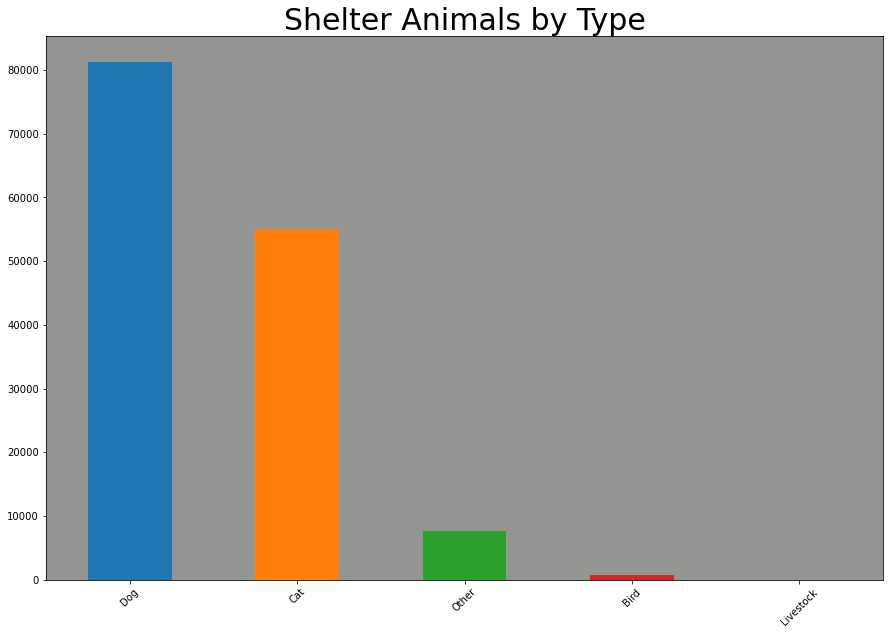

In [30]:
import matplotlib as plt
import matplotlib.colors as mcolors
# fig, axis = plt.subplots()
ax = intakes_and_outcomes['animal_type'].value_counts().plot(kind = 'bar', color= mcolors.TABLEAU_COLORS, figsize=(15, 10))
ax.set_title("Shelter Animals by Type",fontdict={'fontsize':'30'})
ax.set_facecolor('xkcd:grey')
ax.tick_params(axis='x', rotation = 45)


Mostly cats and dogs pass through the shelter, as expected. Theres a smaller number of birds and even less livestock.

How about breed?

In [31]:
intakes_and_outcomes['breed'].value_counts()

Domestic Shorthair Mix             32563
Domestic Shorthair                 12793
Pit Bull Mix                        9158
Labrador Retriever Mix              7702
Chihuahua Shorthair Mix             6592
                                   ...  
Labrador Retriever/Bullmastiff         1
Brittany/Collie Rough                  1
Collie Smooth/Beagle                   1
Whippet/Plott Hound                    1
Schipperke/Cardigan Welsh Corgi        1
Name: breed, Length: 2790, dtype: int64

Thats a huge amount. Lets look at the top 20 or so.

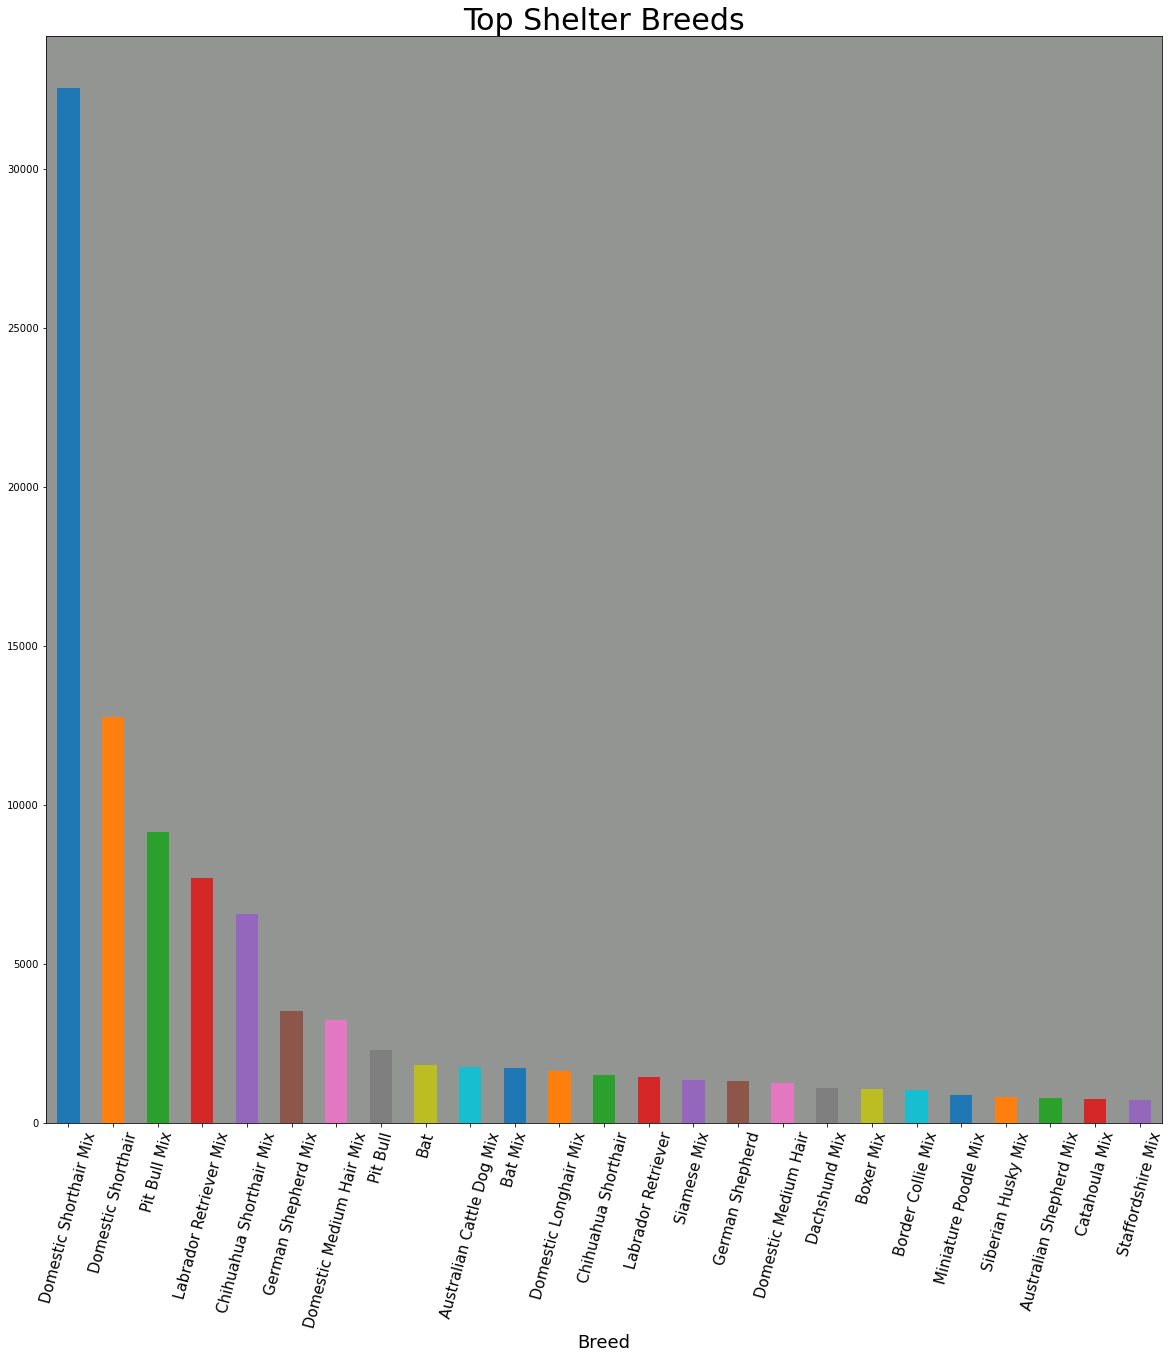

In [32]:
ax = intakes_and_outcomes['breed'].value_counts()[:25].plot(kind = 'bar', color= mcolors.TABLEAU_COLORS, figsize=(20, 20))
ax.set_title("Top Shelter Breeds",fontdict={'fontsize':'30'})
ax.set_facecolor('xkcd:grey')
ax.set_xlabel('Breed', fontsize=18)
ax.tick_params(axis='x', rotation = 75, labelsize=15)


Looks like breeds follows an powerlaw distribution with a handfull of very popular breeds and an extremely long tail of niche eclectic mix breeds. The Domestic Shorthair Mix seems to be a catchall for most cats that come into the shelter. This is followed by some easily identified dog breeds in the Pit Bull, Lab, and Chihuahua. Strangely, bat and "bat mix" follow this up in some of the top spots.

What about intake type and condition?

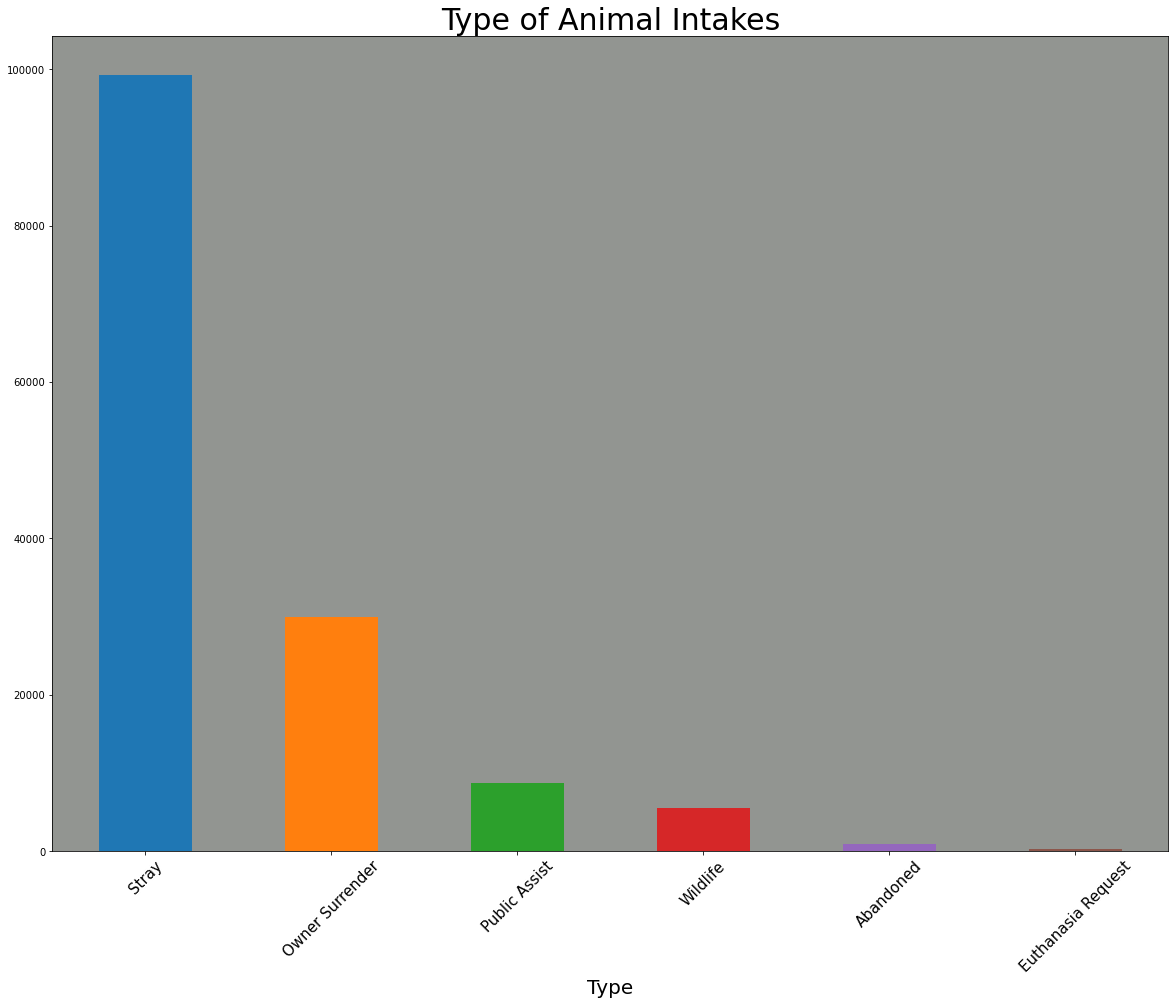

In [33]:
ax = intakes_and_outcomes['intake_type'].value_counts().plot(kind = 'bar', color= mcolors.TABLEAU_COLORS, figsize=(20, 15))
ax.set_title("Type of Animal Intakes",fontdict={'fontsize':'30'})
ax.set_facecolor('xkcd:grey')
ax.set_xlabel('Type', fontsize=20)
ax.tick_params(axis='x', rotation = 45, labelsize=15)


Mostly Strays followed by surrenders. Not too surprising. Luckily, the Abandoned category seems fairly small relative to the others. 

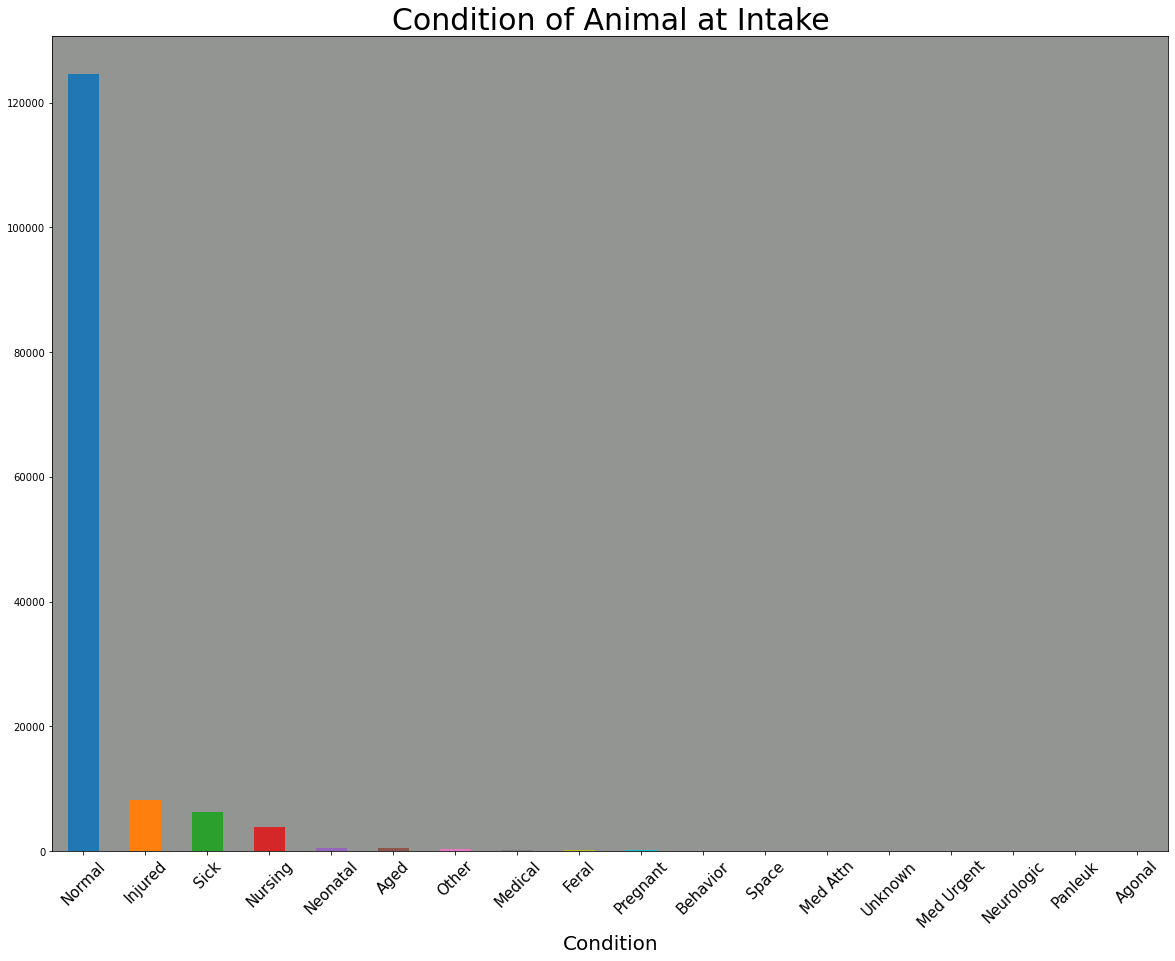

In [34]:
ax = intakes_and_outcomes['intake_condition'].value_counts().plot(kind = 'bar', color= mcolors.TABLEAU_COLORS, figsize=(20, 15))
ax.set_title("Condition of Animal at Intake",fontdict={'fontsize':'30'})
ax.set_facecolor('xkcd:grey')
ax.set_xlabel('Condition', fontsize=20)
ax.tick_params(axis='x', rotation = 45, labelsize=15)

Another exponential distribution. This time heavily weighted for normal intakes. Most categories are self explanatory. Panleuk refers to a virus that infects cats and agonal refers to dying animals. Thankfully, these are the smallest categories. 

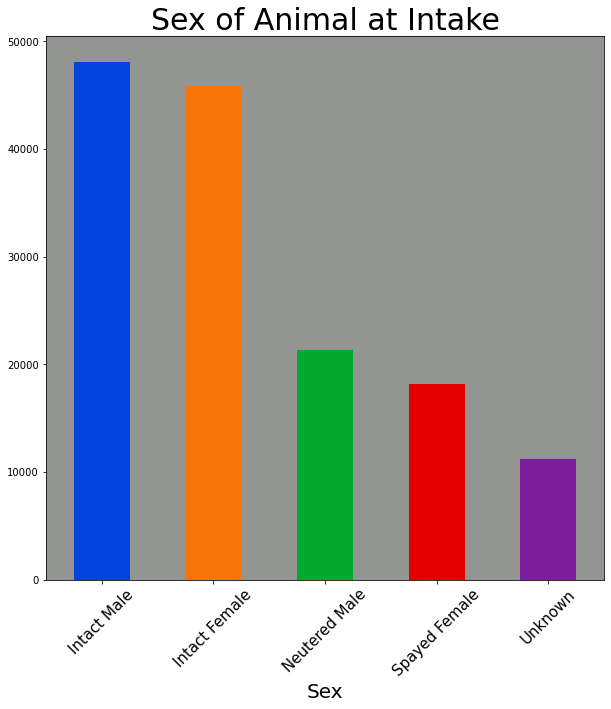

In [35]:

ax = intakes_and_outcomes['sex_upon_intake'].value_counts().plot(kind = 'bar', color= ['xkcd:blue','xkcd:orange','xkcd:kelly green','xkcd:red', 'xkcd:purple']
, figsize=(10, 10))
ax.set_title("Sex of Animal at Intake",fontdict={'fontsize':'30'})
ax.set_facecolor('xkcd:grey')
ax.set_xlabel('Sex', fontsize=20)
ax.tick_params(axis='x', rotation = 45, labelsize=15)

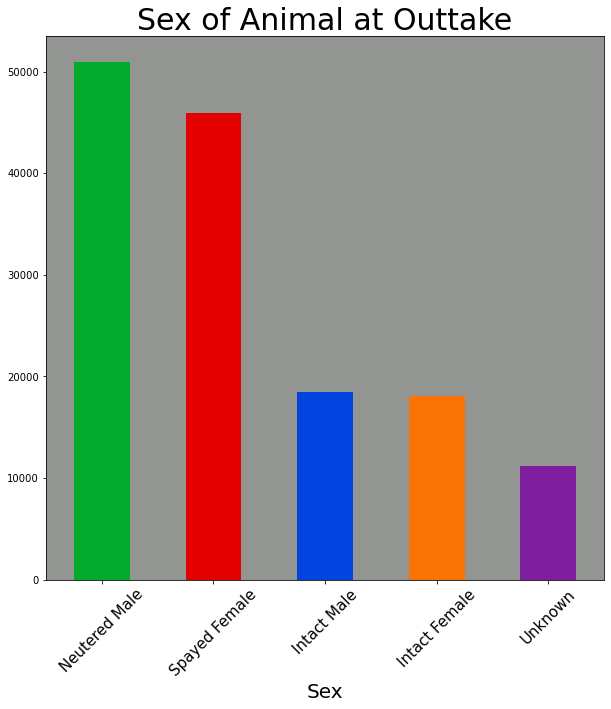

In [36]:
ax = intakes_and_outcomes['sex_upon_outcome'].value_counts().plot(kind = 'bar', color= ['xkcd:kelly green','xkcd:red','xkcd:blue','xkcd:orange', 'xkcd:purple'], figsize=(10, 10))
ax.set_title("Sex of Animal at Outtake",fontdict={'fontsize':'30'})
ax.set_facecolor('xkcd:grey')
ax.set_xlabel('Sex', fontsize=20)
ax.tick_params(axis='x', rotation = 45, labelsize=15)

The intact and fixed columns swap after arriving at the shelter. 

In [37]:
intact_intakes = (intakes_and_outcomes['sex_upon_intake'] == 'Intact Male').sum() + \
(intakes_and_outcomes['sex_upon_intake'] == 'Intact Female').sum()

print( f"{intact_intakes} animals have come into the shelter intact")

fixed_animals = ((intakes_and_outcomes['sex_upon_intake'] == 'Intact Male') & (intakes_and_outcomes['sex_upon_outcome'] == 'Neutered Male') | (intakes_and_outcomes['sex_upon_intake'] == 'Intact Female') & (intakes_and_outcomes['sex_upon_outcome'] == 'Spayed Male')).sum()
print( f"{fixed_animals} of these animals are fixed")

percent_fixed = (fixed_animals/intact_intakes) * 100
print( f" {round(percent_fixed,2)} percent animals that pass through are fixed by the shelter")

93959 animals have come into the shelter intact
29583 of these animals are fixed
 31.49 percent animals that pass through are fixed by the shelter


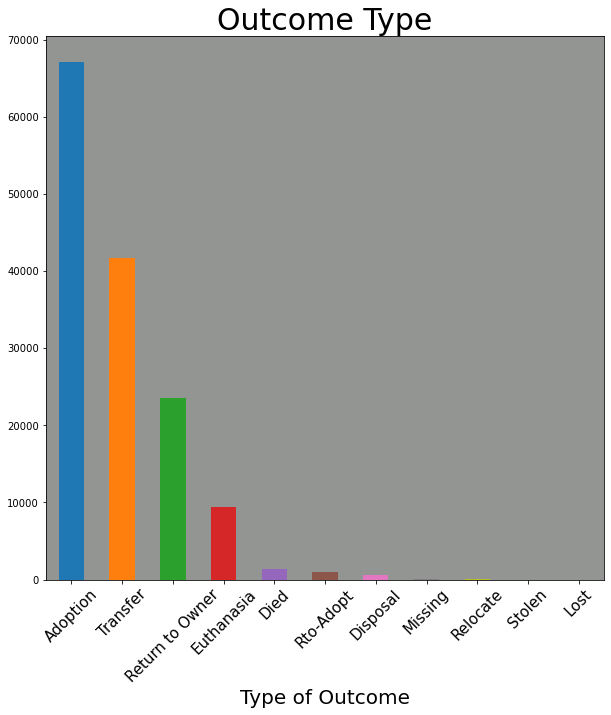

In [38]:
ax = intakes_and_outcomes['outcome_type'].value_counts().plot(kind = 'bar', color= mcolors.TABLEAU_COLORS, figsize=(10, 10))
ax.set_title("Outcome Type",fontdict={'fontsize':'30'})
ax.set_facecolor('xkcd:grey')
ax.set_xlabel('Type of Outcome', fontsize=20)
ax.tick_params(axis='x', rotation = 45, labelsize=15)

Most animals are adopted out or transferred. Rarely, a few animals are lost or stolen. The Austin animal shelter is a "no-kill" shelter. Let's look at their rate of euthanasia.

In [39]:
euthanasia = (intakes_and_outcomes['outcome_type'] == 'Euthanasia').sum()
euthanasia_rate = euthanasia/len(intakes_and_outcomes) * 100
print( f" {round(euthanasia_rate,2)} percent animals that pass through are euthanized")

 6.47 percent animals that pass through are euthanized


Theres also subtypes. Lets look at those.

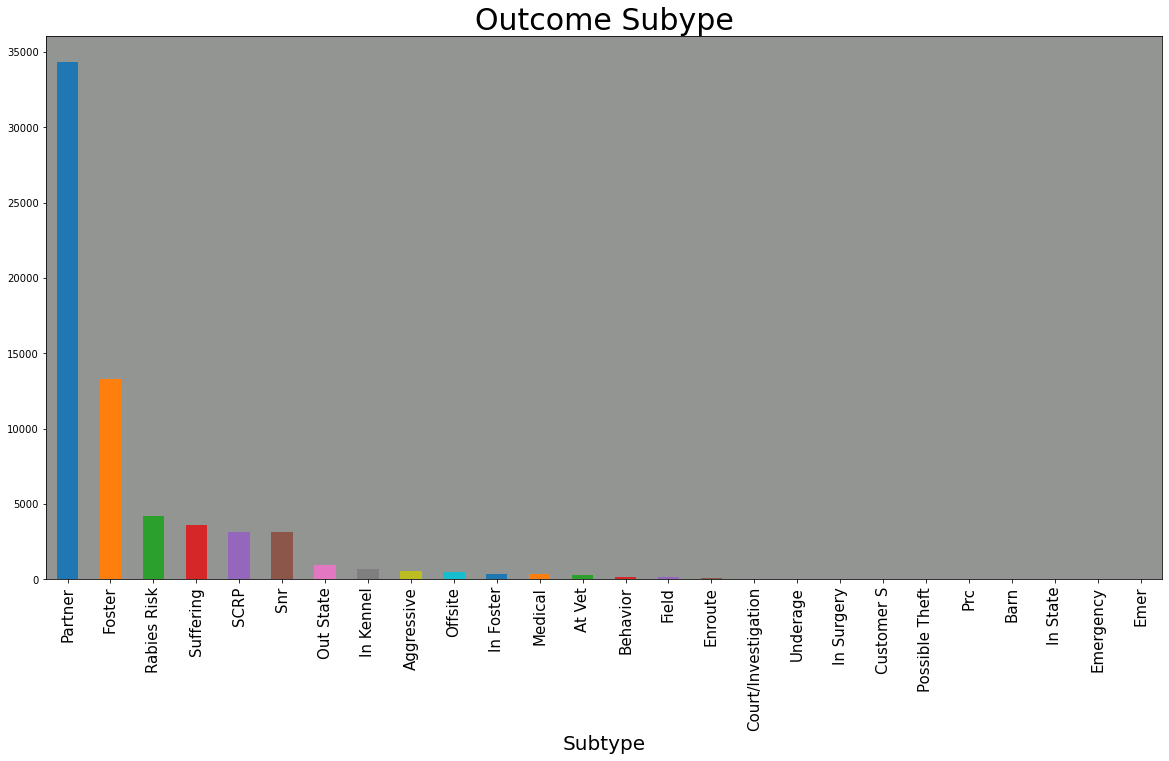

In [40]:


ax = intakes_and_outcomes['outcome_subtype'].value_counts().plot(kind = 'bar', color= mcolors.TABLEAU_COLORS, figsize=(20, 10))
ax.set_title("Outcome Subype",fontdict={'fontsize':'30'})
ax.set_facecolor('xkcd:grey')
ax.set_xlabel('Subtype', fontsize=20)
ax.tick_params(axis='x', rotation = 90, labelsize=15)

Mainly transfers to partnering shelters. The other info doesn't seem particularly useful.

What about color? Let's take a look.

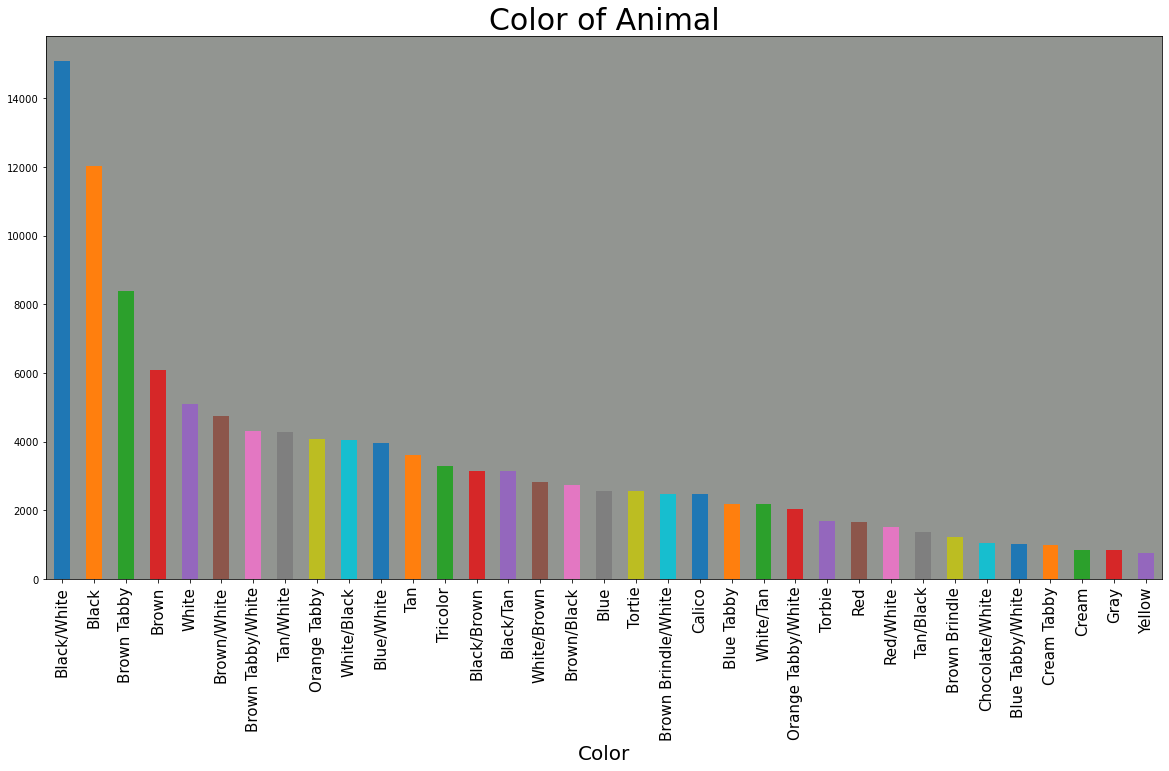

In [41]:

ax = intakes_and_outcomes['color'].value_counts()[:35].plot(kind = 'bar', color= mcolors.TABLEAU_COLORS, figsize=(20, 10))
ax.set_title("Color of Animal",fontdict={'fontsize':'30'})
ax.set_facecolor('xkcd:grey')
ax.set_xlabel('Color', fontsize=20)
ax.tick_params(axis='x', rotation = 90, labelsize=15)

In [42]:
len(intakes_and_outcomes['color'].value_counts())

622

This feature is fairly loosely categorized with 622 different colors. Black, White, and Brown keep the top spots. 

Okay, now that we've looked at most of the features, let's look at some time series information.

## Time Series

<AxesSubplot:xlabel='intake_date'>

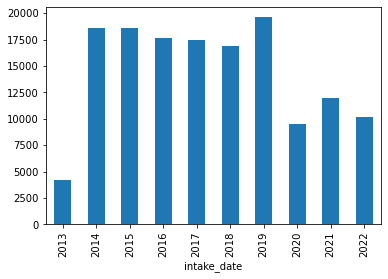

In [43]:
intakes_and_outcomes['intake_date'].groupby( intakes_and_outcomes['intake_date'].dt.year).count().plot( kind = 'bar')

Intakes have been relatively uniform since 2014. It appears that the pandemic has since lowered intakes almost by half.

<AxesSubplot:xlabel='intake_date'>

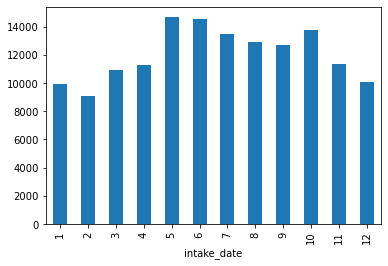

In [44]:
intakes_and_outcomes['intake_date'].groupby( intakes_and_outcomes['intake_date'].dt.month).count().plot( kind = 'bar')

There is a seasonal pattern here. Intakes also occur more in the warmer months and drop off at the end/beginning of the year.

<AxesSubplot:xlabel='release_date'>

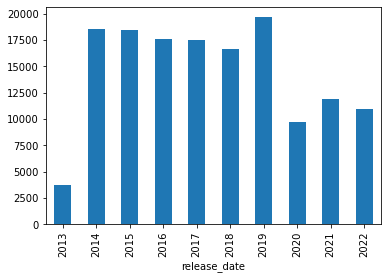

In [45]:
intakes_and_outcomes['release_date'].groupby( intakes_and_outcomes['release_date'].dt.year).count().plot( kind = 'bar')

<AxesSubplot:xlabel='release_date'>

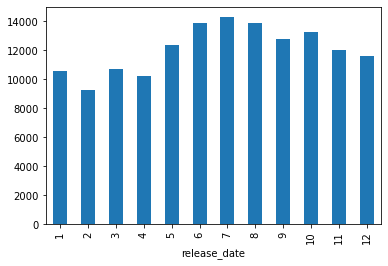

In [46]:
intakes_and_outcomes['release_date'].groupby( intakes_and_outcomes['release_date'].dt.month).count().plot( kind = 'bar')

The same pattern holds for releases as well.

Let's take a look at the distribution of average time that an animal stays at the shelter.

In [47]:
(intakes_and_outcomes['release_date'] - intakes_and_outcomes['intake_date']).describe()

count                        144716
mean     19 days 10:32:13.881395284
std      46 days 01:35:02.294800499
min                 0 days 00:00:00
25%                 1 days 20:56:00
50%                 5 days 06:28:30
75%                16 days 22:52:15
max              1912 days 22:31:00
dtype: object

Lets add this to our dataframe as well. Knowing how long an animal stays at the shelter can give us a lot of information.

In [48]:
intakes_and_outcomes['time_in_shelter'] = (intakes_and_outcomes['release_date'] - intakes_and_outcomes['intake_date'])

In [49]:
longest_years = intakes_and_outcomes['time_in_shelter'].max().days/365

print( f"Longest time an animal has been at the shelter for is: \
{round(longest_years,0)} years! ")

Longest time an animal has been at the shelter for is: 5.0 years! 


In [50]:
intakes_and_outcomes[ intakes_and_outcomes['time_in_shelter'] == intakes_and_outcomes['time_in_shelter'].max()]

,animal_id,name,intake_date,found_location,intake_type,intake_condition,animal_type,sex_upon_intake,age_upon_intake,breed,color,date_of_birth,outcome_type,outcome_subtype,sex_upon_outcome,age_upon_outcome,release_date,time_in_shelter
41715,A642712,Patches,2016-01-05 11:37:00,Crownover St And Caleb Dr in Austin (TX),Stray,Injured,Dog,Spayed Female,6 years,Pit Bull Mix,White/Gray Tiger,2009-11-28T00:00:00.000,Adoption,Foster,Spayed Female,11 years,2021-04-01 10:08:00,1912 days 22:31:00


Looks like Patches had a hard time but was eventually released to a foster.

According to Texas Monthly, Patches was eventually adopted by her foster parent last year! More info here: https://www.texasmonthly.com/being-texan/austin-dog-patches-adopted-after-waiting-1913-days/

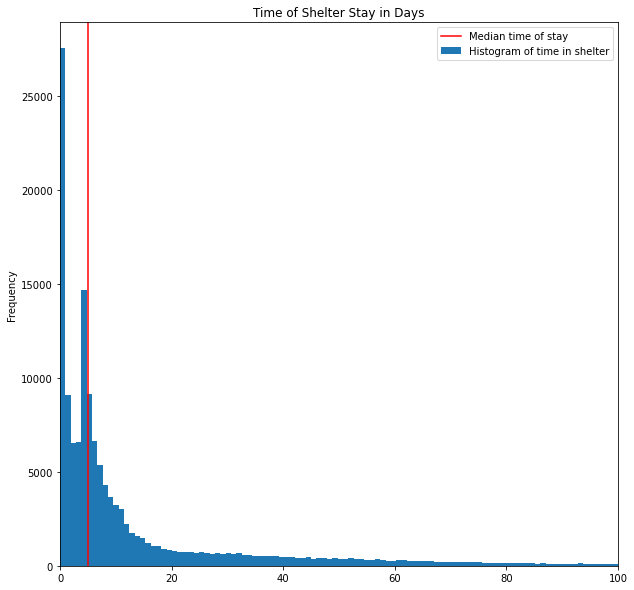

In [51]:
ax = (intakes_and_outcomes['time_in_shelter'].astype('timedelta64[s]') / (60**2 * 24)).plot.hist(bins = 2000, xlim = [0, 100],figsize = (10,10), label = "Histogram of time in shelter" )
ax.set_title('Time of Shelter Stay in Days')
#add red line at the median of 5 days
plt.pyplot.axvline(x = 5, color = 'red', label = 'Median time of stay')
ax.legend()


The distribution appears to be largely expontential with a relatively large lambda value. However, there also seems to be a cluster around the 5 day mark. Lets look at the distribution of adopted and non-injured pets specifically to see if this affects our distribution of an animal's shelter stay.

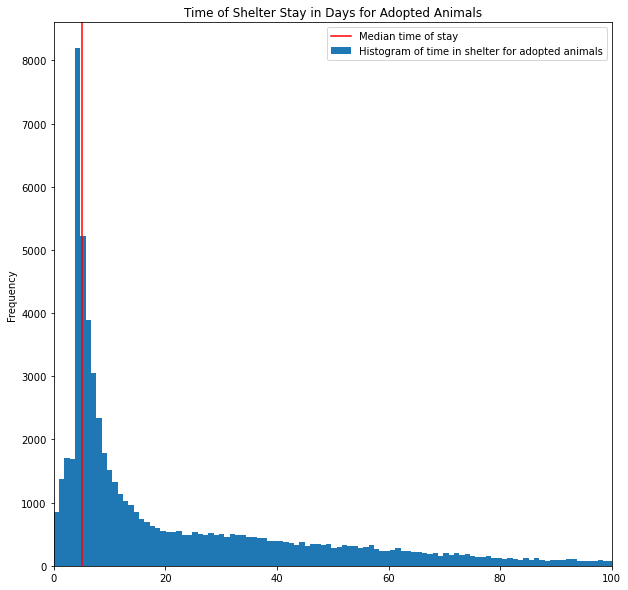

In [52]:
ax = (intakes_and_outcomes[((intakes_and_outcomes['outcome_type'] == 'Adoption')) ]['time_in_shelter'].astype('timedelta64[s]') / (60**2 * 24)).plot.hist(bins = 2000, xlim = [0, 100],figsize = (10,10), label = "Histogram of time in shelter for adopted animals" )
ax.set_title('Time of Shelter Stay in Days for Adopted Animals')
#add red line at the median of 5 days
plt.pyplot.axvline(x = 5, color = 'red', label = 'Median time of stay')
ax.legend()

Considering adoptions only gives us a distribution that looks more normal. Other types of outcomes are like representative of different processes and resolve quickly. For example, dying or euthanized animals would be at the shelter for hours rather than the days of adopted animals. Furthermore, animals returned to their owners or transfered to another facility may only be held for the shelter for a small amount of time. Filtering by animals that are adopted out gives only the information on an average animal's time of stay in the shelter. This allows us to consider how to improve the traditional shelter adoption process without factors that are not always under a shelter's control such as sick or dying animal intakes.

### For further analysis, let's focus on adoptions of animals.

From the shelter's point of view, we want to maximize adoptions so focusing on adoption time may give us data with practical value to improve the adoption process.

## "Black Dog Syndrome"

One anecdotal observation of staff in animal shelters is that black dogs are adopted less often than those with lighter coats. A study of adoption and euthanasia found, using empirical evidence, that Black Dog Syndrome was a real factor in Sacramento County animal adoptions. The study can be found here: https://web.archive.org/web/20100401052756/http://www.animalsandsociety.org/assets/library/78_jaawsleeper.pdf

Let's see if their results are reflected in our Austin dataset.

The 2002 study uses logistic regression to determine differences between euthanasia and adoption between groups of animals. However, the Austin Animal Shelter maintains a "no-kill" policy. According to a press release from the shelter (https://www.austintexas.gov/news/austin-animal-center-has-no-more-space-asks-community-help), "No-kill shelters strive to only euthanize animals who are irremediably suffering or pose a significant public safety threat" and that "Austin Animal Center is required by city ordinance to meet or exceed a 95% live outcome rate." However, we note that the overall kill rate is higher than 5% as demonstrated above.

The original study used logistic regression on animals euthanisized.  However, the Austin's "no-kill" policy makes using logistic regression less desirable here as euthanasia is not nessecarily the result of an animal that has been at the shelter a long time. As a result, we will focus on length of stay within the shelter to determine whether an animal is desired by potential adopters. This analysis assumes that these animals were up for adoption throughout their stay at the shelter. Our analysis also seeks to correct errors in methodology in the previous study which assumed that animals were euthanized if they were "not adopted." However, it does not tell us if the shelter euthanized after a constant period an animal remained un-adopted for or if there were other factors that led to euthanasia. For example, an animal that may appear un-adoptable or more aggressive, as determined by shelter staff, may have been euthanasized before other animals. As a result, the original analysis may be a result of biases in the shelter's selection process and not that of those adopting from the shelter. 

In [53]:
intakes_and_outcomes['outcome_type'].value_counts()

Adoption           67121
Transfer           41640
Return to Owner    23519
Euthanasia          9370
Died                1328
Rto-Adopt            966
Disposal             649
Missing               72
Relocate              23
Stolen                 2
Lost                   1
Name: outcome_type, dtype: int64

Lets first consider only dogs that were adopted and that had normal status upon arrival. This will filter out cases of injury that may prolong the length of time an animal stayed at the shelter such as Patches

In [54]:
BDS = intakes_and_outcomes[(intakes_and_outcomes['outcome_type'] == 'Adoption') & (intakes_and_outcomes['animal_type'] == 'Dog') ]

In [55]:
len(BDS)

39201

Now, we will seperate into adopted dogs that have a pure black coat and all others.

In [56]:
BDS[BDS['color'] == 'Black']['time_in_shelter'].describe()

count                          1835
mean     29 days 17:05:14.125340599
std      64 days 04:14:34.789641974
min                 0 days 01:19:00
25%                 4 days 07:56:00
50%                 8 days 08:19:00
75%                27 days 18:35:00
max              1026 days 21:15:00
Name: time_in_shelter, dtype: object

In [57]:
pd.concat([BDS, BDS[BDS['color'] == 'Black'], BDS[BDS['color'] == 'Black']]).drop_duplicates(keep=False)['time_in_shelter'].describe()

count                         37366
mean     28 days 22:01:05.734089814
std      63 days 03:44:19.005190049
min                 0 days 00:00:00
25%                 4 days 08:58:15
50%                 8 days 02:03:00
75%                26 days 19:38:00
max              1912 days 22:31:00
Name: time_in_shelter, dtype: object

Hmm, seems the distributions for these distinct sets of observations appear nearly the same. However, many of the colors within the non-black category may have black patterns or otherwise. For example, a Black/White dog could have an almost entirely black coat. Indeed, there are actually labels for both Black/White and White/Black. Assuming that the first color is the dominant one in the animal's coat, let's see if we can further refine our data.

In [58]:
#colors in this set
# Note regex is used to gather all colors starting with Black but not ending with Black
print(BDS[BDS['color'].str.contains('^Black[\/\w]*$' , regex=True)]['color'].value_counts())
#number of observations
print(len(BDS[BDS['color'].str.contains('^Black[\/\w]*$' , regex=True)]))

Black/White        5036
Black              1835
Black/Tan          1590
Black/Brown        1524
Black/Tricolor      292
Black/Gray           96
Black/Red            40
Black/Black          34
Black/Cream          24
Black/Fawn           10
Black/Buff            8
Black/Silver          6
Black/Orange          2
Black/Yellow          2
Black/Chocolate       2
Black/Blue            1
Name: color, dtype: int64
10502


In [59]:
#all the other colors of adopted dogs
print(pd.concat([BDS, BDS[BDS['color'].str.contains('^Black[\/\w]*$' , regex=True)], BDS[BDS['color'].str.contains('^Black[\/\w]*$' , regex=True)]]).drop_duplicates(keep=False)['color'].value_counts())
#number of observations
print(len(pd.concat([BDS, BDS[BDS['color'].str.contains('^Black[\/\w]*$' , regex=True)], BDS[BDS['color'].str.contains('^Black[\/\w]*$' , regex=True)]]).drop_duplicates(keep=False)['color']))

Brown/White          2257
Tan/White            2137
White                1725
Tan                  1710
Tricolor             1601
                     ... 
Black Smoke/Black       1
White/Gray Tiger        1
Silver/Cream            1
Sable/Buff              1
Blue/Blue Tick          1
Name: color, Length: 294, dtype: int64
28699


In [60]:
BDS[BDS['color'].str.contains('^Black[\/\w]*$' , regex=True)]['time_in_shelter'].describe()

count                         10502
mean     27 days 18:33:48.705008570
std      60 days 06:19:23.458034094
min                 0 days 00:49:00
25%                 4 days 09:24:45
50%                 8 days 00:48:00
75%                25 days 04:03:00
max              1167 days 19:55:00
Name: time_in_shelter, dtype: object

In [61]:
pd.concat([BDS, BDS[BDS['color'].str.contains('^Black[\/\w]*$' , regex=True)], BDS[BDS['color'].str.contains('^Black[\/\w]*$' , regex=True)]]).drop_duplicates(keep=False)['time_in_shelter'].describe()

count                         28699
mean     29 days 09:17:03.115091118
std      64 days 05:47:12.194607745
min                 0 days 00:00:00
25%                 4 days 08:44:00
50%                 8 days 02:41:00
75%                27 days 03:50:30
max              1912 days 22:31:00
Name: time_in_shelter, dtype: object

Even considering dogs that are partially black, we get a similar distribution between both sets. Indeed, the lighter coats actually have a larger mean in this case. However, this seems to be the result of outliers as the medians are within 2 hours of another. 

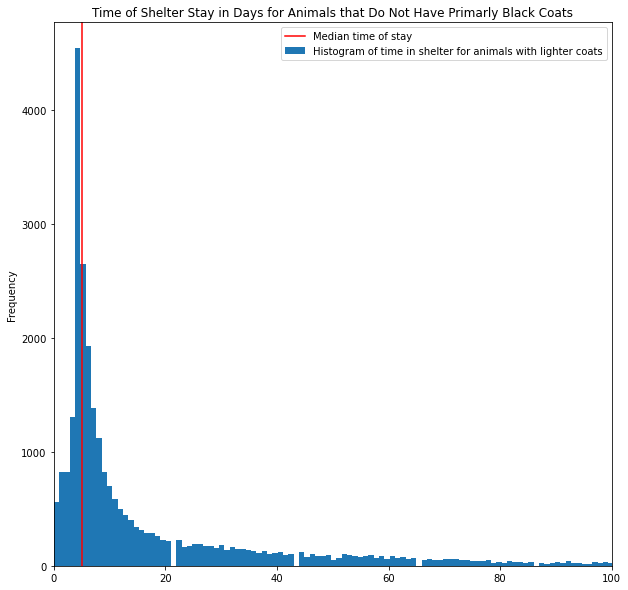

In [62]:
ax = (pd.concat([BDS, BDS[BDS['color'].str.contains('^Black[\/\w]*$' , regex=True)], BDS[BDS['color'].str.contains('^Black[\/\w]*$' , regex=True)]]).drop_duplicates(keep=False)['time_in_shelter'].dt.days).plot(kind = "hist", bins = 2000, xlim = [0,100], figsize = (10,10), label = "Histogram of time in shelter for animals with lighter coats")
ax.set_title('Time of Shelter Stay in Days for Animals that Do Not Have Primarly Black Coats')
#add red line at the median of 5 days
plt.pyplot.axvline(x = 5, color = 'red', label = 'Median time of stay')
ax.legend()

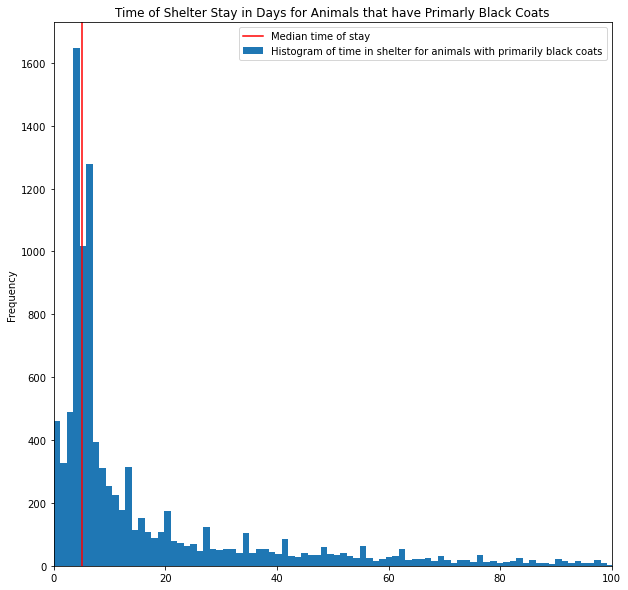

In [63]:
ax = ( BDS[BDS['color'].str.contains('^Black[\/\w]*$' , regex=True)]['time_in_shelter'].dt.days).plot(kind = "hist", bins = 1000, xlim = [0,100], figsize = (10,10), label = "Histogram of time in shelter for animals with primarily black coats")
ax.set_title('Time of Shelter Stay in Days for Animals that have Primarly Black Coats')
#add red line at the median of 5 days
plt.pyplot.axvline(x = 5, color = 'red', label = 'Median time of stay')
ax.legend()

The distributions look very similar in all respects except size. Let's perform a Mann-Whitney U rank test to see if there is a significant difference in the means here (just to be sure). Since we are only interested if dogs with primarily black coats are larger than their counterparts, we will use an upper upper test. We are using the Mann-Whitney U rank test since we cannot confidently assume that the distribution is normal here, based on the plots above. 

In [64]:
from scipy.stats import mannwhitneyu
mannwhitneyu(BDS[BDS['color'].str.contains('^Black[\/\w]*$' , regex=True)]['time_in_shelter'].dt.total_seconds()/(60**2 * 24), pd.concat([BDS, BDS[BDS['color'].str.contains('^Black[\/\w]*$' , regex=True)], BDS[BDS['color'].str.contains('^Black[\/\w]*$' , regex=True)]]).drop_duplicates(keep=False)['time_in_shelter'].dt.total_seconds() / (60**2 * 24), alternative = 'greater' )

MannwhitneyuResult(statistic=149511225.5, pvalue=0.8842423151166274)

Due to the very large p-value, we reject the alternate hypothesis that dogs with coats that are primarily black stay in the shelter longer than their counterparts with lighter coats. Therefore, we cannot conclude that those that adopt from the Austin shelter show any predjudice against black or dogs with darker coats.

While it is referred to as Black Dog Syndrome, some of the underlying theories are due to cultural factors. Similarly, black cats have their own "Black Cat Syndrome" as they may be associated with witchcraft and supernatural events. Furthermore, some cultures regard them as bad luck. https://www.history.com/news/black-cats-superstitions

Let's perform the same test procedure again, this time for cats within the shelter.